<a href="https://colab.research.google.com/github/BNSaiKiran92/MyGithub-Repo/blob/main/NaiveBayes1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Health Outcomes of Horses with Machine Learning

### Context

Welcome to the **Scaler Health Analytics** team! Our objective is to leverage advanced analytics to predict health outcomes in horses, enabling veterinarians to make more informed decisions that can improve treatment strategies and overall horse health management. Utilizing machine learning techniques, particularly classification algorithms, you will analyze clinical data from horses to predict various health outcomes.

### Dataset Description

You have been provided with a comprehensive dataset containing clinical records of horses treated in a veterinary hospital. The data encapsulates a variety of clinical attributes that offer insights into the general health and medical condition of each horse. Each record in the dataset is described by the following features:

### Clinical Attributes:
- **id:** Unique identifier for each horse.
- **surgery:** Whether the horse had surgery (Yes/No).
- **age:** Age of the horse.
- **hospital_number:** Unique number assigned to the horse at the hospital.
- **rectal_temp:** Rectal temperature of the horse.
- **pulse:** Pulse rate in beats per minute.
- **respiratory_rate:** Respiratory rate in breaths per minute.
- **temp_of_extremities:** Temperature of extremities (a possible indicator of shock).
- **peripheral_pulse:** Quality of the peripheral pulse.
- **mucous_membrane:** Color of the mucous membranes, which can indicate blood circulation quality.
- **capillary_refill_time:** Time taken for color to return to mucous membrane after pressure is applied.
- **pain:** Horse's pain level (graded).
- **peristalsis:** Intestinal activity observed.
- **abdominal_distention:** Any distention of the abdomen.
- **nasogastric_tube:** Whether a nasogastric tube has been placed.
- **nasogastric_reflux:** Any nasogastric reflux noted.
- **nasogastric_reflux_ph:** pH of the nasogastric reflux.
- **rectal_exam_feces:** Findings of the rectal examination of feces.
- **abdomen:** Detailed examination findings of the abdomen.
- **packed_cell_volume:** Packed cell volume, indicating hydration status and blood loss.
- **total_protein:** Total protein levels in blood.
- **abdomo_appearance:** Appearance of abdominal fluid.
- **abdomo_protein:** Protein level in abdominal fluid.
- **surgical_lesion:** Presence of surgical lesions.
- **lesion_1, lesion_2, lesion_3:** Type and location of lesions identified.
- **cp_data:** Clinical pathology data.
- **outcome:** Health outcome of the horse (e.g., recovered, euthanized, died).

Your task is to use machine learning models to predict the 'outcome' for each horse and identify key predictors of health outcomes. This project will contribute significantly to improving the predictive models used in veterinary practices.

In [6]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/072/101/original/health_outcome_dataset.csv

--2025-04-30 07:41:39--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/072/101/original/health_outcome_dataset.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 3.167.84.28, 3.167.84.196, 3.167.84.9, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|3.167.84.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 229201 (224K) [text/plain]
Saving to: ‘health_outcome_dataset.csv’

health_outcome_data 100%[===================>] 223.83K  --.-KB/s    in 0.009s  

2025-04-30 07:41:39 (24.3 MB/s) - ‘health_outcome_dataset.csv’ saved [229201/229201]



In [7]:
import pandas as pd

df = pd.read_csv("health_outcome_dataset.csv")
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [3]:
df.isna().sum()

,0
id,0
surgery,0
age,0
hospital_number,0
rectal_temp,0
pulse,0
respiratory_rate,0
temp_of_extremities,39
peripheral_pulse,60
mucous_membrane,21


In [8]:
import pandas as pd
from sklearn.impute import SimpleImputer

df.drop('lesion_3', inplace = True, axis = 1)

# Create imputer objects
num_imputer = SimpleImputer(strategy='median')  # Imputer for numerical data
cat_imputer = SimpleImputer(strategy='most_frequent')  # Imputer for categorical data

# Define columns by type
num_cols = ['rectal_temp', 'pulse', 'respiratory_rate']  # Numerical columns
cat_cols = ['temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time',
            'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube',
            'nasogastric_reflux', 'abdomen', 'abdomo_appearance', 'rectal_exam_feces']  # Categorical columns

# Apply imputation
df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [5]:
df['outcome'].value_counts()


,count
outcome,
lived,574
died,410
euthanized,251




---



### Pulse Rate Distribution

#### Context:
Analyzing the pulse rate distribution among horses with different health outcomes can provide critical insights into physiological states associated with various health conditions. This analysis can help veterinarians understand how pulse rate might correlate with the severity or type of condition a horse is facing.

#### Task:
Create a visual representation to analyze the pulse rate distribution across different health outcomes using the 'pulse' and 'outcome' columns in the dataset.

#### Instructions:
1. **Group and Count Data:** Use the dataset to group entries by 'outcome' and calculate the average 'pulse' for each outcome category.
2. **Visualize Data:** Generate a box plot to display the distribution of pulse rates for each health outcome category. This will help in visually comparing the pulse rate variability associated with different outcomes.
3. **Analyze Trends:** Examine the box plot to determine which health outcome is associated with the highest average pulse rate and which shows the most variability in pulse rates.

#### Question:
After analyzing the box plot representing the pulse rate distribution for different health outcomes, identify the correct statements regarding pulse rates.

#### Options:
A) The average pulse rate is highest among horses that lived, indicating recovery from potentially distressing conditions.

B) The average pulse rate is lowest for horses that were euthanized, suggesting less physiological distress before euthanasia.

C) The average pulse rate is highest among horses that died, suggesting a correlation between high pulse rates and critical health conditions leading to death.

D) The box plot shows no significant difference in the average pulse rates across different health outcomes.

outcome
died          90.207317
euthanized    86.573705
lived         68.918118
Name: pulse, dtype: float64


<ipython-input-9-0025ed726fb0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='outcome', y='pulse', data=df, palette=custom_palette)
<ipython-input-9-0025ed726fb0>:12: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.boxplot(x='outcome', y='pulse', data=df, palette=custom_palette)


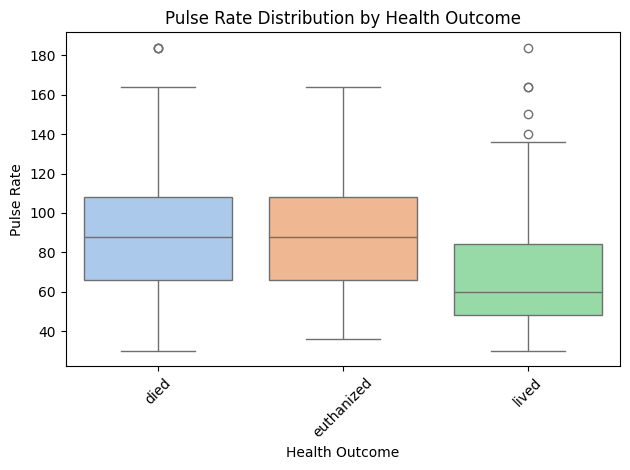

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# TODO: Group the dataframe by 'outcome' and calculate the average 'pulse' for each outcome category.
pulse_outcome_data = df.groupby('outcome')['pulse'].mean()  # Consider what function might summarize the data effectively.
print(pulse_outcome_data)

# Set a custom color palette (optional)
custom_palette = sns.color_palette("pastel")

# TODO: Utilize seaborn to create a box plot that shows variation within grouped data.
sns.boxplot(x='outcome', y='pulse', data=df, palette=custom_palette)
plt.title('Pulse Rate Distribution by Health Outcome')
plt.xlabel('Health Outcome')
plt.ylabel('Pulse Rate')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()

##Learning Point:
This question demonstrates the importance of understanding physiological indicators like pulse rate in assessing the health outcomes of animals. A box plot is an effective visualization tool to compare the distribution of a continuous variable across different categories.
In this case, it highlights how pulse rate varies with different health outcomes in horses. Analyzing such data can help veterinarians make informed decisions by correlating physiological states with health outcomes, thus improving diagnostic and treatment strategies.



---

### Rectal Temperature Correlation

#### Context:
Understanding how rectal temperature correlates with health outcomes in horses can provide valuable insights for veterinary treatment strategies. Rectal temperature is a critical clinical parameter and its deviations from the norm can indicate various health conditions.

#### Task:
Analyze the impact of different rectal temperature categories on health outcomes. The rectal temperatures will be categorized into hypothermia, normal, and fever to observe how these conditions correlate with health outcomes.

#### Instructions:
1. **Create Temperature Categories:** Add a new column to the dataset, 'temp_category', which categorizes rectal temperature into hypothermia (<37.5°C), normal (37.5-38.5°C), and fever (>38.5°C).
2. **Group Data by Temperature Category:** Group the dataset by 'temp_category' and 'outcome' to analyze the distribution of health outcomes within each temperature category.
3. **Visualize and Analyze Data:** Create a bar chart to visualize the count of each health outcome within the different temperature categories. This will help identify any significant correlations between rectal temperature and health outcomes.

#### Question:
After analyzing the bar chart which depicts the count of health outcomes within each rectal temperature category, identify the correct statement regarding the correlation between rectal temperature categories and health outcomes.

#### Options:
A) Horses with fever have the highest survival rate.

B) Normal rectal temperature is associated with the best health outcomes.

C) Horses with hypothermia are more likely to be euthanized.

D) There is no significant relationship between rectal temperature categories and health outcomes.


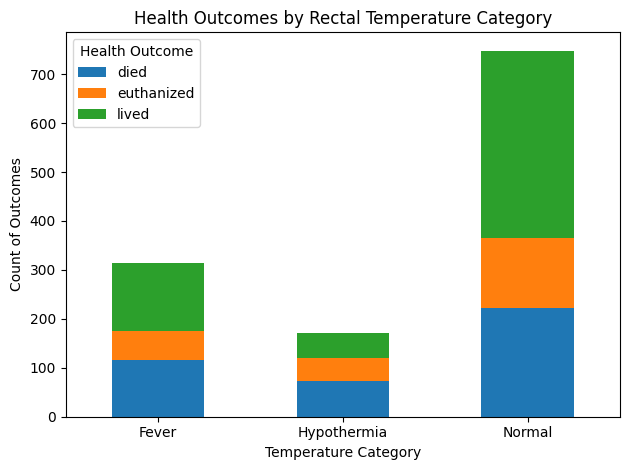

In [13]:
import matplotlib.pyplot as plt
# Define function to categorize rectal temperature
def categorize_temp(temp):
    # TODO: Return the category based on temperature values (use if-elif-else structure).
    if temp <37.5:
      return 'Hypothermia'

    elif temp >38.5:
      return 'Fever'

    else:
      return 'Normal'


# Apply function to create a new column
df['temp_category']=df['rectal_temp'].apply(categorize_temp)

#Group the dataset by temp_category
 # TODO: Group by two columns and count a unique identifier.
grouped_data = df.groupby(['temp_category','outcome']).count()['id'].reset_index()
grouped_data.columns = ['Temperature Category', 'Outcome', 'Count']

# Create a pivot table for visualization
pivot_table = pd.pivot_table(grouped_data, values= 'Count', index= 'Temperature Category', columns='Outcome', fill_value=0)  # TODO: Fill the blanks to correctly set up the pivot table parameters.

# Plotting the data
pivot_table.plot(kind='bar', stacked=True)
plt.title('Health Outcomes by Rectal Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Count of Outcomes')
plt.xticks(rotation=0)
plt.legend(title='Health Outcome')
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()






##Learning Point:
This exercise highlights the crucial role of rectal temperature as an indicator of health in veterinary medicine. By categorizing temperatures into hypothermia, normal, and fever, and analyzing the distribution of health outcomes within these categories, veterinarians can gain insights into the typical physiological states associated with different health conditions.
The analysis helps in understanding which temperature ranges are most commonly associated with stable conditions, aiding in better diagnosis and management of equine health.
This kind of data-driven approach can significantly enhance the effectiveness of veterinary care by allowing practitioners to anticipate and mitigate potential health issues based on temperature deviations.



---


### Naive Bayes Assumption and Its Impact

#### Context:
The Naive Bayes classifier, while simple and effective, assumes feature independence which may affect its application in complex datasets like "Predict Horse Health Outcomes."

#### Task:
Evaluate how the Naive Bayes assumption of feature independence affects its performance on a dataset with interdependent features such as surgery, age, pulse, and mucous membrane status.

#### Instructions:
1. **Review the Assumption:** Consider the independence assumption of Naive Bayes.
2. **Assess Potential Impacts:** Reflect on how this assumption might influence the model's effectiveness, especially where features might be interrelated.
3. **Select the Most Accurate Statement:** Choose the statement that best describes Naive Bayes' assumption and its impact on the dataset.

#### Statements:
1. **Naive Bayes treats all features as equally interdependent.** This is suited for datasets with strong feature correlations, potentially making it less effective for independent feature scenarios.
   
2. **Naive Bayes assumes independence among features.** This could pose challenges if features like pulse and mucous membrane status, which may be related, are not truly independent.
   
3. **Naive Bayes expects numerical features to behave like categorical variables.** This might complicate handling datasets with a mix of feature types.
   
4. **Naive Bayes requires features to be independent and may need preprocessing to handle correlations like those between pulse and mucous membrane status.**

#### Question:
Considering the assumption and potential impacts of Naive Bayes on the horse health outcomes dataset, which statement number is most accurate?

#### Options:
A) Statement 1

B) Statement 2

C) Statement 3

D) Statement 4

Correct Answer: Statement 2

Explanation:

Statement 1: “Naive Bayes treats all features as equally interdependent.”
This statement is incorrect. Naive Bayes does not treat features as interdependent; rather, it assumes that all features are independent of each other. This assumption simplifies the computation, especially in complex models, but can lead to inaccuracies when the features are actually interrelated.

Statement 2: “Naive Bayes assumes independence among features.”
This statement is correct and captures the essence of the Naive Bayes classifier. It assumes that each feature contributes independently to the outcome, which is not always the case in real-world data, such as in datasets where pulse and mucous membrane status might be related. This can lead to a degradation in performance when the independence assumption is violated.

Statement 3: “Naive Bayes expects numerical features to behave like categorical variables.”
This statement is misleading. While Naive Bayes can handle both numerical and categorical data, it does not inherently treat numerical features as categorical. There are specific types of Naive Bayes classifiers for handling numerical data, such as Gaussian Naive Bayes, which assumes that the numerical features follow a Gaussian distribution.

Statement 4: “Naive Bayes requires features to be independent and may need preprocessing to handle correlations like those between pulse and mucous membrane status.”
This statement is partially correct in that Naive Bayes does require features to be independent for optimal performance. However, the statement as a whole might be seen as slightly misleading because it suggests preprocessing is typically applied to address interdependencies in Naive Bayes, which is not commonly practiced. The primary challenge remains the model’s underlying assumption of independence, which preprocessing alone may not adequately address.



---

### Analyzing Pain and Euthanasia Decisions

#### Context:
Understanding the decision-making process in veterinary care, particularly euthanasia, can be crucial in managing horse health outcomes. Analyzing how pain levels influence these decisions is particularly significant.

#### Task:
Using Bayes' Theorem, calculate the probability that a horse is euthanized given it experiences severe pain and assess what this indicates about the role of pain in euthanasia decisions.

#### Instructions:
1. **Review Given Probabilities:**
   - P(Severe Pain) = 0.20
   - P(Euthanized) = 0.25
   - P(Severe Pain | Euthanized) = 0.50

2. **Calculate the Probability:** Use Bayes' Theorem to find P(Euthanized | Severe Pain).

3. **Interpret the Result:** Consider what the calculated probability implies about the impact of severe pain on euthanasia decisions.


#### Question:
Based on the calculation using Bayes' Theorem, what is the probability that a horse is euthanized given that it is experiencing severe pain? What does this probability suggest about the impact of severe pain on the decision to euthanize?

#### Options:
A) 0.40

B) 0.50

C) 0.75

D) 0.625


Correct Answer: A) 0.625
Code:
# Given probabilities
P_SeverePain = 0.20
P_Euthanized = 0.25
P_SeverePain_Euthanized = 0.50

# Bayes' Theorem calculation

P_Euthanized_SeverePain = (P_SeverePain_Euthanized * P_Euthanized) / P_SeverePain

print("Probability of being euthanized given severe pain: {:.3f}".format(P_Euthanized_SeverePain))

Learning Point:

This question illustrates the application of Bayes’ Theorem in a real-world context, particularly in veterinary decision-making concerning euthanasia.

By calculating the probability that a horse experiencing severe pain will be euthanized, we gain insight into how significant pain levels are in influencing such critical decisions.

A probability of 0.625 suggests that there is a substantial likelihood that severe pain can lead to decisions to euthanize, highlighting the importance of pain management and ethical considerations in veterinary care.

This understanding is crucial for veterinarians as they navigate the complex balance between animal welfare and quality of life.



---

### Evaluating Feature Significance with Chi-square Test

#### Context:
In statistical analysis for data, the Chi-square test of independence is essential for determining the association between features. This test helps identify which features are statistically significant in relation to the outcome variable in a dataset.

#### Task:
Perform a Chi-square test of independence on each Categorical feature against the 'outcome' variable to determine their significance in predicting health outcomes of horses. Given the significance level of 0.05, identify which Categoricalfeature is not significantly associated with the outcome.

#### Instructions:
1. **Perform Chi-square Tests:** Apply the Chi-square test to each Categorical feature against the 'outcome' variable.
2. **Interpret Results:** Evaluate the p-values to determine which Categorical feature(s) fail to show a significant association with the outcome, suggesting they may not be useful for predictive modeling in this context.


#### Question:
Based on a significance level of 0.05, which Categorical feature was found to be not significantly associated with the 'outcome' variable, therefore failing the Chi-square test?

#### Options:
A) temp_of_extremities

B) peripheral_pulse

C) pain

D) All columns passed

In [ ]:
from scipy.stats import chi2_contingency

threshold = 0.05  # Significance level

print(f'{"Column":<25} | Test result')
print('----------------------------------------')

for column in cat_cols:
    # Create a contingency table
    contingency_table = pd.crosstab(df[column], df['outcome'])

    # Perform the Chi-Square test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Display results
    print(f'{column:<25} |   ', '\033[32mPassed' if p < threshold else '\033[31mFailed', '\033[0m')

#Learning Point:
#The Chi-square test of independence is a crucial statistical tool for analyzing relationships between categorical variables. In this context, it is used to determine which features are significantly associated with the health outcomes of horses.
#The test’s result helps in identifying features that might influence the outcome variable and those that do not, facilitating better feature selection for predictive modeling.
#Understanding which features do not significantly impact the outcome can help streamline the modeling process, focusing efforts on variables that truly matter.
#This finding aids in refining the dataset and improving the accuracy and efficiency of any subsequent models.

---

### Data Preprocessing for Modelling

#### Context:
In preparation for building a Gaussian Naive Bayes model to predict horse health outcomes, the initial step involves preprocessing the dataset. This includes dropping less relevant columns and applying appropriate transformations to the remaining data.

#### Task:
Prepare the data by dropping specified columns and applying transformations suitable for a Gaussian Naive Bayes model.

#### Instructions:
1. **Drop Columns:**
   - Remove the 'id' columns from the dataset.
2. **Apply Transformations:**
   - Use `StandardScaler` to normalize numerical data.
   - Apply `OrdinalEncoder` to encode categorical data that handles unknown values.
3. **Split the Data:**
   - Use `train_test_split` with a `random_state=0` to divide the data into training and test sets, targeting 'outcome' as the label. `test_size = 0.2`

#### Question:
After preprocessing, which categorical feature ends up with the highest number of unique ordinal values?

#### Options:
A) temp_of_extremities

B) pain and mucous_membrane

C) cp_data and abdomen

D) nasogastric_reflux


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder  # TODO: Import necessary preprocessing classes.
from sklearn.compose import ColumnTransformer
import
import seaborn as sns

# Drop unnecessary columns
df_temp = df.drop('id',axis=1)


# Identify numerical and categorical columns
numerical_cols = df_temp.select_dtypes(include=[int, float]).columns.tolist()  # TODO: Specify data types to select numerical (int and float both) columns.
categorical_cols = df_temp.select_dtypes(include=[object]).columns.tolist()  # TODO: Specify the data type for categorical(object).

## Remove the target column from the feature lists
categorical_cols.remove('outcome')

# Prepare target and features
X= df.drop('outcome', axis=1)
y = df['outcome']


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # TODO: Use the appropriate function to split the data.

# Create transformers for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # TODO: Choose the correct transformer for numerical data.
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols)  # TODO: Choose the correct transformer for categorical data that handles unknown categories.
    ])

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)  # TODO: Fit and Apply the preprocessor to training data.
X_test = preprocessor.transform(X_test)  # TODO: Apply the preprocessor to test data.


print(f'{"Column":<25} | Number of unique values')
print('------'*10)
for i in categorical_cols:
    print(f'{i:<25} |   ', f'\033[32m{df[i].unique()}' , '\033[0m')


ModuleNotFoundError: No module named 'matlplotlib'

Learning Point:
Essential Preprocessing: Removing irrelevant columns like ‘id’ simplifies the model’s input space and prevents overfitting, while applying transformations such as StandardScaler and OrdinalEncoder ensures that all features contribute appropriately to the model, maintaining consistency across numerical and categorical data.

Data Splitting: By dividing the data into training and test sets, the model can be evaluated on unseen data, ensuring that its performance is both reliable and generalizable.

Feature Analysis: Understanding which categorical features have the highest number of unique values after encoding helps highlight the complexity and diversity of the data, guiding more targeted feature engineering and model refinement strategies.



---

### Bernoulli Naive Bayes Classifier

#### Context:
Evaluating the performance of the Bernoulli Naive Bayes classifier not only through traditional classification metrics but also by analyzing the types of errors made can offer deeper insights into the model's behavior. A confusion matrix is particularly useful for this purpose as it visualizes the performance of an algorithm by showing the actual versus predicted classifications.

#### Task:
Generate a confusion matrix for the Bernoulli Naive Bayes model and analyze which outcome categories are most frequently misclassified.

#### Instructions:
1. **Prepare and Train the Model:**
   - Implement the Bernoulli Naive Bayes classifier and train it on the dataset.
   - Predict the outcomes using the test set.

2. **Generate a Confusion Matrix:**
   - Create a confusion matrix to visualize the model’s predictions against the actual values.

3. **Analyze Misclassifications:**
   - Examine the confusion matrix to determine which category is most frequently misclassified as "Euthanized."

#### Question:
According to the confusion matrix generated from the Bernoulli Naive Bayes model, which category is most frequently incorrectly predicted as "Euthanized"?

#### Options:
A) Died

B) Lived

C) Both 'Died' and 'Lived' are equally misclassified as 'Euthanized'

D) Neither 'Died' nor 'Lived' is misclassified as 'Euthanized'


Bernoulli Naive Bayes Classification Report:
              precision    recall  f1-score   support

        Died       0.66      0.79      0.72        89
  Euthanized       0.55      0.67      0.60        42
       Lived       0.74      0.58      0.65       116

    accuracy                           0.67       247
   macro avg       0.65      0.68      0.66       247
weighted avg       0.68      0.67      0.67       247



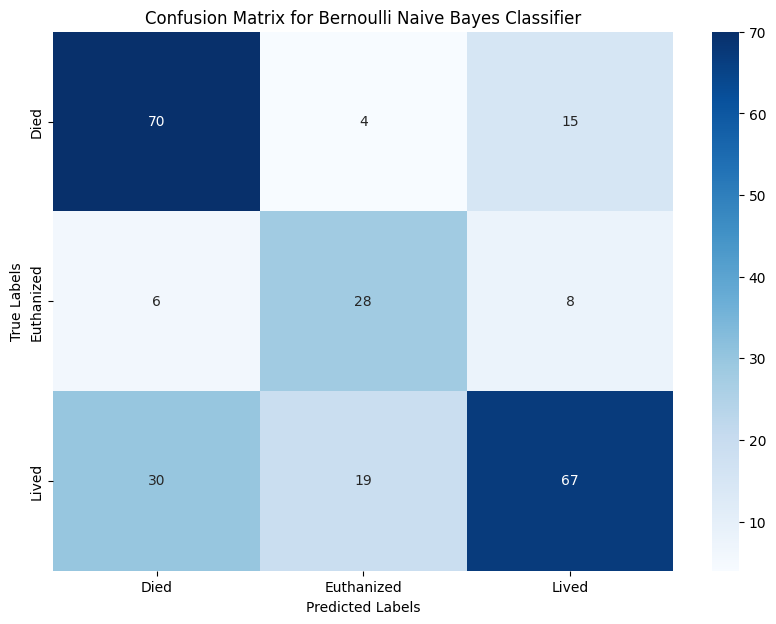

In [15]:
from sklearn.naive_bayes import BernoulliNB  # TODO: Correctly import the Bernoulli Naive Bayes classifier.
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Encoding the 'outcome' variable
outcome_map = {'died': 0, 'euthanized': 1, 'lived': 2}
y_train_encoded = y_train.map(outcome_map)  # TODO: Apply the mapping to the 'y_train' series.
y_test_encoded = y_test.map(outcome_map)  # TODO: Apply the mapping to the 'y_test' series.

# Train Bernoulli Naive Bayes classifier
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train_encoded)  # TODO: Fit the Bernoulli Naive Bayes model using training data.
y_pred_ber = bernoulli_nb.predict(X_test)  # TODO: Predict outcomes using the test set.

print("Bernoulli Naive Bayes Classification Report:")
print(classification_report(y_test_encoded, y_pred_ber, target_names=['Died', 'Euthanized', 'Lived']))  # TODO: Fill in the classification report with the appropriate arguments.

# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_ber)  # TODO: Provide the correct variables to generate the confusion matrix.
categories = ['Died', 'Euthanized', 'Lived']

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Bernoulli Naive Bayes Classifier')
plt.show()

Learning Point:
This example demonstrates the importance of choosing the right model based on the nature of the data in predictive modeling.
Bernoulli Naive Bayes, typically used for binary or boolean data, may perform differently depending on how continuous features are handled (e.g., binarization). Gaussian Naive Bayes, suited for continuous data, assumes that features follow a normal distribution.
The comparison shows that even with a basic application, one model may perform better than another based on how well the assumptions of the model fit the data characteristics.
This underscores the need for careful feature engineering and model selection in machine learning tasks to optimize performance.